# Proton ID scoring example

Code is located here: https://github.com/k-woodruff/protonid

There is a simple python script (predict_multi.py) that imports XGBoost(https://github.com/dmlc/xgboost) and the pre-trained Booster object, imports the csv containing the track features that you want to score as a pandas dataframe, and predicts. Then it adds the scores to the dataframe. The script is called predict_multi.py and this example shows how to run it.

### Getting csv files from analysis tree
There are currently two ways of getting all of the reconstructed features used out of the analysis tree files.

1. There is a ROOT macro that you can find here:
/uboone/app/users/kwoodruf/ana2csv/ana2csv_bnbcos.C
(It is pretty bloated and inefficient.)

2. Erez Cohen wrote a larlite module that is much faster and more efficient to get these variables out. You can contact him on how to use it.

If you just want to look at MCC7 monte carlo samples, I can point you to where csv files already exist.

## Predicting scores

In this example, we are scoring a small sample of BNB+cosmic Monte Carlo files from MCC7. All of the features that are used as input to score the tracks are pulled from the analysis tree files and written to a csv. The location of the csv that you want to score is the argument of the predict_data function.

The function returns a pandas dataframe that contains all of the information from the csv in addition to the predicted scores for each of the five possible classes (proton, muon, pion, electron/photon, and cosmic).

In [1]:
import predict_multi

In [2]:
data = predict_multi.predict_data('data/bnb/featuresana_bnbcosmic_october.csv')

Ex: look at all of the cosmic scores for all of the tracks in the sample:

In [6]:
print data[['mscore_cos']]

      mscore_cos
0       0.000150
1       0.991786
2       0.976635
3       0.012406
4       0.988741
5       0.999126
6       0.465445
7       0.077194
8       0.960060
9       0.014253
10      0.011351
11      0.013440
12      0.031443
13      0.016569
14      0.000828
15      0.000835
16      0.932547
17      0.005565
18      0.660447
19      0.962197
20      0.972752
21      0.020815
22      0.002200
23      0.007027
24      0.021470
25      0.041770
26      0.815703
27      0.746770
28      0.835901
29      0.999037
...          ...
9970    0.968454
9971    0.872649
9972    0.989565
9973    0.000039
9974    0.000190
9975    0.811541
9976    0.000403
9977    0.467032
9978    0.899694
9979    0.008005
9980    0.996500
9981    0.069135
9982    0.440117
9983    0.980839
9984    0.999048
9985    0.997767
9986    0.991164
9987    0.998884
9988    0.002411
9989    0.505374
9990    0.117291
9991    0.187854
9992    0.999913
9993    0.973313
9994    0.965641
9995    0.991023
9996    0.9984

We can also look at the muon scores for all of the BNB muons in the sample:

In [7]:
print data[['mscore_mu']][(data.mcpdg == 13) & (data.mcorigin == 1)]

      mscore_mu
0      0.999446
14     0.538466
31     0.110061
56     0.904116
83     0.774758
84     0.092356
102    0.971906
111    0.985455
114    0.977197
122    0.996712
139    0.996917
140    0.132057
145    0.997705
146    0.722359
171    0.545810
215    0.547323
225    0.998017
254    0.995435
271    0.993630
314    0.835415
323    0.924339
350    0.240956
354    0.015847
374    0.246860
380    0.627048
387    0.987912
405    0.572721
406    0.828839
423    0.999236
435    0.877766
...         ...
9409   0.997943
9412   0.981385
9426   0.804291
9432   0.979061
9434   0.117047
9449   0.005923
9479   0.954749
9499   0.974698
9501   0.801159
9502   0.854751
9514   0.062385
9556   0.995728
9565   0.954242
9608   0.978807
9638   0.022445
9657   0.978986
9680   0.968617
9717   0.994709
9731   0.968277
9741   0.970892
9745   0.180340
9751   0.948128
9824   0.162386
9881   0.996785
9898   0.997076
9901   0.997898
9922   0.054870
9924   0.985783
9959   0.871502
9964   0.043744

[495 ro

## Score cut

The other function in the python script is score_cut(). It takes the pandas data frame that was returned from predict_data() and returns a slice that includes all of the rows that have a proton score above a certain threshold.

Here we look for all tracks with a proton score above 0.95:

In [8]:
data_pass = predict_multi.score_cut(data,0.95)

We can see how many pass and how many are true protons:

In [9]:
print 'Number of passing tracks: %s' %len(data_pass)
print 'Number of passing protons: %s' %len(data_pass[data_pass.mcpdg == 2212])
print 'Fraction true protons: %.3f' %(np.true_divide(len(data_pass[data_pass.mcpdg == 2212]),len(data_pass)))

Number of passing tracks: 574
Number of passing protons: 554
Fraction true protons: 0.965


We can take a look at what particle types are passing the score cut:

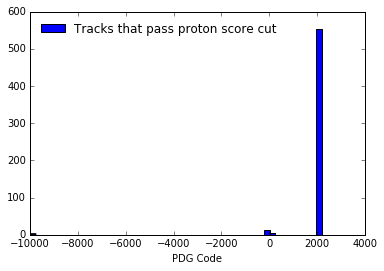

In [17]:
plt.hist(data_pass.mcpdg,bins=50, label='Tracks that pass proton score cut');
plt.xlabel('PDG Code');
plt.legend(loc='upper left', frameon=False);

Or we can look at the true kinetic energy of the protons that pass:

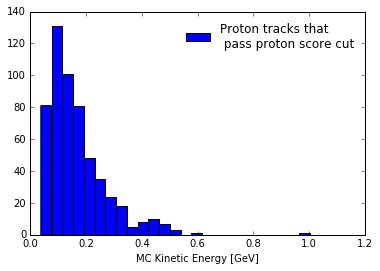

In [20]:
plt.hist(data_pass.mckinetic[data_pass.mcpdg == 2212],bins=25,label='Proton tracks that \n pass proton score cut');
plt.xlabel('MC Kinetic Energy [GeV]');
plt.legend(loc='upper right', frameon=False);